In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


# Data Acquisition


In [ ]:
LoL_data = pd.read_csv('http://raw.githubusercontent.com/NtuJiaZe/SC1015-Group-Assignment/main/League%20of%20Legend%20dataset.csv')
print(LoL_data.dtypes)

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


# Checking for empty entries in dataset

In [ ]:
LoL_data.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [ ]:
winsCheck=pd.DataFrame(LoL_data["blueWins"])
winsCheck.value_counts()

blueWins
0           4949
1           4930
dtype: int64

# Focusing on blue team


---

**Reason**: Since there is only blue or red. If blue win, red must lose, vice versa. With the wins between both teams being similar, we can just focus on one team as the machine learning between both teams wouldn't be too different.

In [ ]:
blue_side_columns = []
for col in LoL_data.columns:
       if "blue" in col:
              blue_side_columns.append(col)

In [ ]:
blue_data = LoL_data[blue_side_columns]
blue_data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


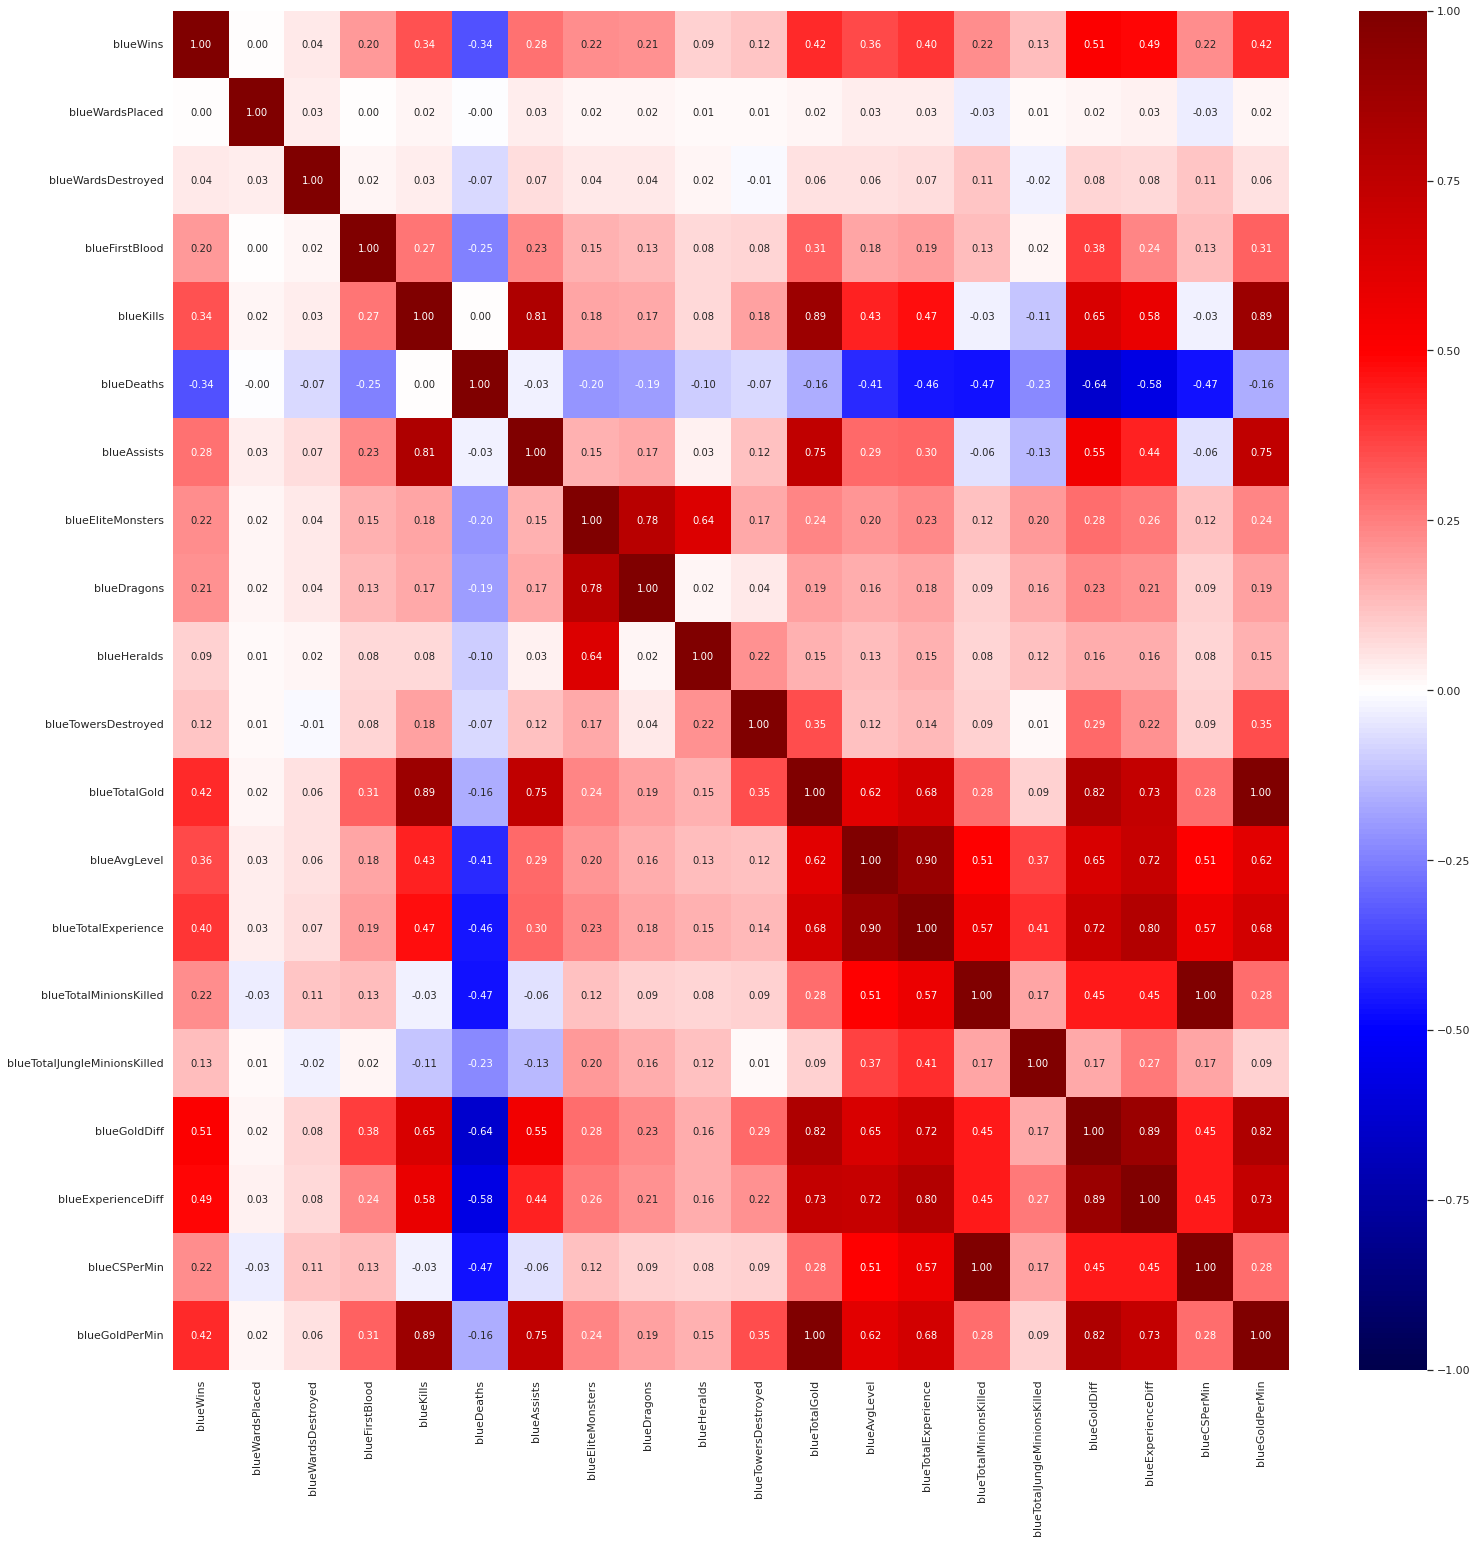

In [ ]:
plt.figure(figsize=(25, 25))
sb.heatmap(blue_data.corr(),cmap='seismic', annot=True, fmt='.2f', vmin=-1)

# Dropping data

**Gold and Experience**


---


blueTotalExperience  
blueExperienceDiff  
blueAvgLevel  
blueTotalGold  
blueGoldDiff  
blueGoldPerMin  

**Reason**: Although they have high correlation to blueWins. They are all results of actions such as killing opposing team or monsters. We want to focus on what actions we should do in order to improve the win rate, knowing we need more gold and experience is not telling us what we should focus on.


---


**Duplicated data**


---



blueEliteMonsters

**Reason**: It is the sum of blueDragon and blueHeralds

blueCSPerMin

**Reason**: It it blueTotalMinionsKilled/10


---



In [ ]:
blue_data_cleaned = blue_data.copy()
blue_data_cleaned.shape

(9879, 20)

In [ ]:
dataToBeRemoved = [ ]
for column in list(blue_data_cleaned.columns):
    if 'Gold' in column:
        dataToBeRemoved.append(column)
    elif 'Experience' in column:
        dataToBeRemoved.append(column)
    elif 'Elite' in column:
        dataToBeRemoved.append(column)
    elif 'CS' in column:
        dataToBeRemoved.append(column)
    elif 'Level' in column:
        dataToBeRemoved.append(column)
        
print(dataToBeRemoved)

['blueEliteMonsters', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']


In [ ]:
blue_data_cleaned = blue_data_cleaned.drop(dataToBeRemoved,axis=1)
blue_data_cleaned.shape

(9879, 12)

## Looking at skewness of the data

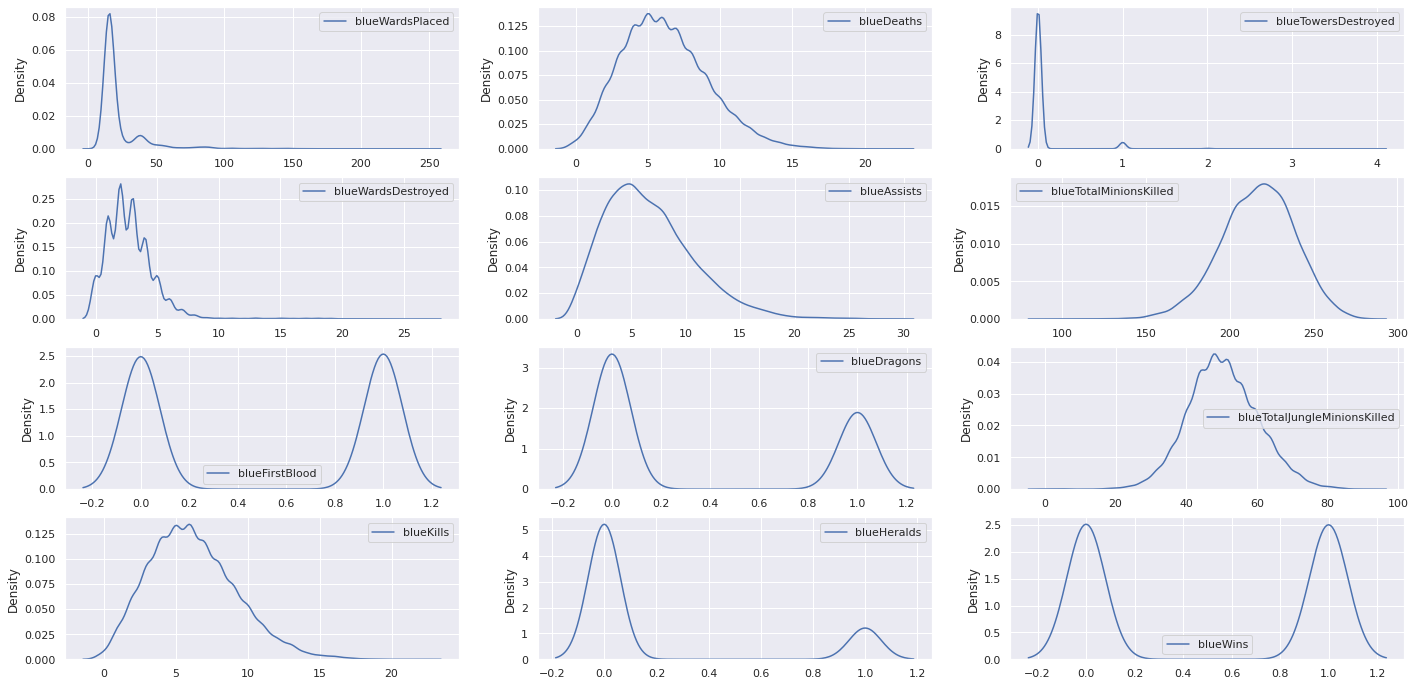

In [ ]:
blueWardsPlaced = pd.DataFrame(blue_data_cleaned["blueWardsPlaced"])
blueWardsDestroyed = pd.DataFrame(blue_data_cleaned["blueWardsDestroyed"])
blueFirstBlood = pd.DataFrame(blue_data_cleaned["blueFirstBlood"])
blueKills = pd.DataFrame(blue_data_cleaned["blueKills"])
blueDeaths = pd.DataFrame(blue_data_cleaned["blueDeaths"])
blueAssists = pd.DataFrame(blue_data_cleaned["blueAssists"])
blueDragons = pd.DataFrame(blue_data_cleaned["blueDragons"])
blueHeralds = pd.DataFrame(blue_data_cleaned["blueHeralds"])
blueTowersDestroyed = pd.DataFrame(blue_data_cleaned["blueTowersDestroyed"])
blueTotalMinionsKilled = pd.DataFrame(blue_data_cleaned["blueTotalMinionsKilled"])
blueTotalJungleMinionsKilled = pd.DataFrame(blue_data_cleaned["blueTotalJungleMinionsKilled"])
blueWins=pd.DataFrame(blue_data_cleaned["blueWins"])

fig, axes = plt.subplots(4, 3, figsize=(24, 12))
sb.kdeplot(data = blueWardsPlaced, ax = axes[0,0])
sb.kdeplot(data = blueWardsDestroyed, ax = axes[1,0])
sb.kdeplot(data = blueFirstBlood, ax = axes[2,0])
sb.kdeplot(data = blueKills, ax = axes[3,0])
sb.kdeplot(data = blueDeaths, ax = axes[0,1])
sb.kdeplot(data = blueAssists, ax = axes[1,1])
sb.kdeplot(data = blueDragons, ax = axes[2,1])
sb.kdeplot(data = blueHeralds, ax = axes[3,1])
sb.kdeplot(data = blueTowersDestroyed, ax = axes[0,2])
sb.kdeplot(data = blueTotalMinionsKilled, ax = axes[1,2])
sb.kdeplot(data = blueTotalJungleMinionsKilled, ax = axes[2,2])
sb.kdeplot(data = blueWins, ax = axes[3,2])

# Numerical and categorical

**Categorical**


---


blueTowersDestroyed  
blueDragons  
blueHeralds  
blueFirstBlood  

**Reason:** They have very few variation between them so we will classify them as categorical data.


---

**Numberical**


---


blueWardsPlaced  
blueDeaths  
blueWardsDestroyed  
blueAssists  
blueTotalMinionsKilled  
blueTotalJungleMinionsKilled  
blueKills  

**Reason:** The rest will be classified as numberical data accordingly.

---


# Removing numberical outliers


In [ ]:
blue_data_cleaned_no_outlier = blue_data_cleaned.copy()


blueWardsPlaced_NoOutlier = pd.DataFrame(blue_data_cleaned["blueWardsPlaced"])
blueWardsPlaced_Min = (blueWardsPlaced.quantile(0.25) - (1.5 * (blueWardsPlaced.quantile(0.75)-blueWardsPlaced.quantile(0.25))))
blueWardsPlaced_Max = (blueWardsPlaced.quantile(0.75) + (1.5 * (blueWardsPlaced.quantile(0.75)-blueWardsPlaced.quantile(0.25))))
blueWardsPlaced_upper = np.where(blueWardsPlaced_NoOutlier > blueWardsPlaced_Max)
blueWardsPlaced_lower = np.where(blueWardsPlaced_NoOutlier < blueWardsPlaced_Min)

blueDeaths_NoOutlier = pd.DataFrame(blue_data_cleaned["blueDeaths"])
blueDeaths_Min = (blueDeaths.quantile(0.25) - (1.5 * (blueDeaths.quantile(0.75)-blueDeaths.quantile(0.25))))
blueDeaths_Max = (blueDeaths.quantile(0.75) + (1.5 * (blueDeaths.quantile(0.75)-blueDeaths.quantile(0.25))))
blueDeaths_upper = np.where(blueDeaths_NoOutlier > blueDeaths_Max)
blueDeaths_lower = np.where(blueDeaths_NoOutlier < blueDeaths_Min)

blueWardsDestroyed_NoOutlier = pd.DataFrame(blue_data_cleaned["blueWardsDestroyed"])
blueWardsDestroyed_Min = (blueWardsDestroyed.quantile(0.25) - (1.5 * (blueWardsDestroyed.quantile(0.75)-blueWardsDestroyed.quantile(0.25))))
blueWardsDestroyed_Max = (blueWardsDestroyed.quantile(0.75) + (1.5 * (blueWardsDestroyed.quantile(0.75)-blueWardsDestroyed.quantile(0.25))))
blueWardsDestroyed_upper = np.where(blueWardsDestroyed_NoOutlier > blueWardsDestroyed_Max)
blueWardsDestroyed_lower = np.where(blueWardsDestroyed_NoOutlier < blueWardsDestroyed_Min)

blueAssists_NoOutlier = pd.DataFrame(blue_data_cleaned["blueAssists"])
blueAssists_Min = (blueAssists.quantile(0.25) - (1.5 * (blueAssists.quantile(0.75)-blueAssists.quantile(0.25))))
blueAssists_Max = (blueAssists.quantile(0.75) + (1.5 * (blueAssists.quantile(0.75)-blueAssists.quantile(0.25))))
blueAssists_upper = np.where(blueAssists_NoOutlier > blueAssists_Max)
blueAssists_lower = np.where(blueAssists_NoOutlier < blueAssists_Min)

blueTotalMinionsKilled_NoOutlier = pd.DataFrame(blue_data_cleaned["blueTotalMinionsKilled"])
blueTotalMinionsKilled_Min = (blueTotalMinionsKilled.quantile(0.25) - (1.5 * (blueTotalMinionsKilled.quantile(0.75)-blueTotalMinionsKilled.quantile(0.25))))
blueTotalMinionsKilled_Max = (blueTotalMinionsKilled.quantile(0.75) + (1.5 * (blueTotalMinionsKilled.quantile(0.75)-blueTotalMinionsKilled.quantile(0.25))))
blueTotalMinionsKilled_upper = np.where(blueTotalMinionsKilled_NoOutlier > blueTotalMinionsKilled_Max)
blueTotalMinionsKilled_lower = np.where(blueTotalMinionsKilled_NoOutlier < blueTotalMinionsKilled_Min)

blueTotalJungleMinionsKilled_NoOutlier = pd.DataFrame(blue_data_cleaned["blueTotalJungleMinionsKilled"])
blueTotalJungleMinionsKilled_Min = (blueTotalJungleMinionsKilled.quantile(0.25) - (1.5 * (blueTotalJungleMinionsKilled.quantile(0.75)-blueTotalJungleMinionsKilled.quantile(0.25))))
blueTotalJungleMinionsKilled_Max = (blueTotalJungleMinionsKilled.quantile(0.75) + (1.5 * (blueTotalJungleMinionsKilled.quantile(0.75)-blueTotalJungleMinionsKilled.quantile(0.25))))
blueTotalJungleMinionsKilled_upper = np.where(blueTotalJungleMinionsKilled_NoOutlier > blueTotalJungleMinionsKilled_Max)
blueTotalJungleMinionsKilled_lower = np.where(blueTotalJungleMinionsKilled_NoOutlier < blueTotalJungleMinionsKilled_Min)

blueKills_NoOutlier = pd.DataFrame(blue_data_cleaned["blueKills"])
blueKills_Min = (blueKills.quantile(0.25) - (1.5 * (blueKills.quantile(0.75)-blueKills.quantile(0.25))))
blueKills_Max = (blueKills.quantile(0.75) + (1.5 * (blueKills.quantile(0.75)-blueKills.quantile(0.25))))
blueKills_upper = np.where(blueKills_NoOutlier > blueKills_Max)
blueKills_lower = np.where(blueKills_NoOutlier < blueKills_Min)

In [ ]:
todrop = []

for i in range(len(blue_data_cleaned)):
  todrop.append(0)

for i in blueWardsPlaced_upper[0]:
    todrop[i]=-1
for i in blueWardsPlaced_lower[0]:
    todrop[i]=-1

for i in blueWardsDestroyed_upper[0]:
    todrop[i]=-1
for i in blueWardsDestroyed_lower[0]:
    todrop[i]=-1

for i in blueDeaths_upper[0]:
    todrop[i]=-1
for i in blueDeaths_lower[0]:
    todrop[i]=-1

for i in blueAssists_upper[0]:
    todrop[i]=-1
for i in blueAssists_lower[0]:
    todrop[i]=-1

for i in blueTotalMinionsKilled_upper[0]:
    todrop[i]=-1
for i in blueTotalMinionsKilled_lower[0]:
    todrop[i]=-1

for i in blueTotalJungleMinionsKilled_upper[0]:
    todrop[i]=-1
for i in blueTotalJungleMinionsKilled_lower[0]:
    todrop[i]=-1

for i in blueKills_upper[0]:
    todrop[i]=-1
for i in blueKills_lower[0]:
    todrop[i]=-1


In [ ]:
for i in range(len(blue_data_cleaned)):
  if todrop[i] == -1:
      blue_data_cleaned_no_outlier.drop([i], axis=0, inplace=True)

blue_data_cleaned_no_outlier.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
count,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000
mean,0.492228,16.123446,2.638212,0.502202,6.010881,6.065933,6.313083,0.352461,0.184326,0.047668,217.751295,50.402332
std,0.499972,3.183496,1.667555,0.500028,2.813987,2.821581,3.612968,0.477768,0.387775,0.231158,21.079405,9.162227
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,26.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,203.000000,44.000000
50%,0.000000,16.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,219.000000,50.000000
75%,1.000000,18.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,233.000000,56.000000
max,1.000000,29.000000,8.000000,1.000000,14.000000,14.000000,16.000000,1.000000,1.000000,4.000000,276.000000,74.000000


# KDE plot after removing outliers

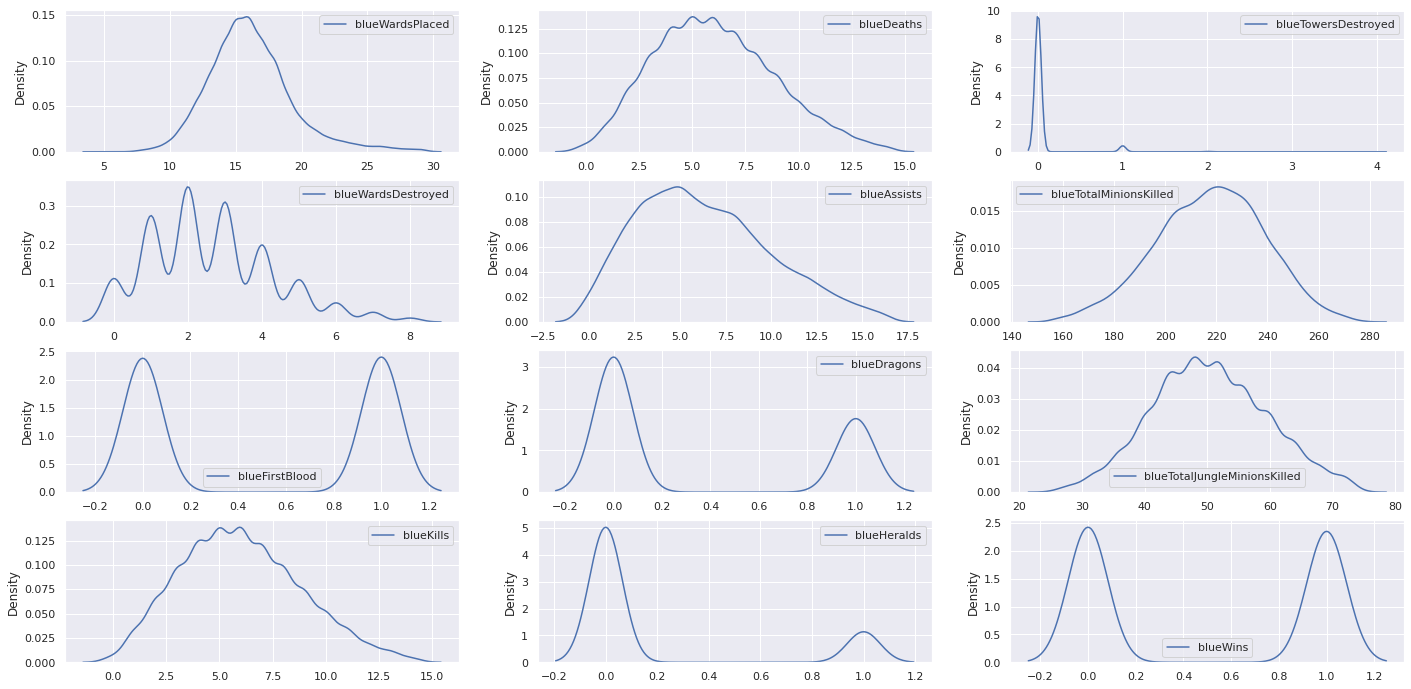

In [ ]:
blueWardsPlaced = pd.DataFrame(blue_data_cleaned_no_outlier["blueWardsPlaced"])
blueWardsDestroyed = pd.DataFrame(blue_data_cleaned_no_outlier["blueWardsDestroyed"])
blueFirstBlood = pd.DataFrame(blue_data_cleaned_no_outlier["blueFirstBlood"])
blueKills = pd.DataFrame(blue_data_cleaned_no_outlier["blueKills"])
blueDeaths = pd.DataFrame(blue_data_cleaned_no_outlier["blueDeaths"])
blueAssists = pd.DataFrame(blue_data_cleaned_no_outlier["blueAssists"])
blueDragons = pd.DataFrame(blue_data_cleaned_no_outlier["blueDragons"])
blueHeralds = pd.DataFrame(blue_data_cleaned_no_outlier["blueHeralds"])
blueTowersDestroyed = pd.DataFrame(blue_data_cleaned_no_outlier["blueTowersDestroyed"])
blueTotalMinionsKilled = pd.DataFrame(blue_data_cleaned_no_outlier["blueTotalMinionsKilled"])
blueTotalJungleMinionsKilled = pd.DataFrame(blue_data_cleaned_no_outlier["blueTotalJungleMinionsKilled"])
blueWins=pd.DataFrame(blue_data_cleaned_no_outlier["blueWins"])

fig, axes = plt.subplots(4, 3, figsize=(24, 12))
sb.kdeplot(data = blueWardsPlaced, ax = axes[0,0])
sb.kdeplot(data = blueWardsDestroyed, ax = axes[1,0])
sb.kdeplot(data = blueFirstBlood, ax = axes[2,0])
sb.kdeplot(data = blueKills, ax = axes[3,0])
sb.kdeplot(data = blueDeaths, ax = axes[0,1])
sb.kdeplot(data = blueAssists, ax = axes[1,1])
sb.kdeplot(data = blueDragons, ax = axes[2,1])
sb.kdeplot(data = blueHeralds, ax = axes[3,1])
sb.kdeplot(data = blueTowersDestroyed, ax = axes[0,2])
sb.kdeplot(data = blueTotalMinionsKilled, ax = axes[1,2])
sb.kdeplot(data = blueTotalJungleMinionsKilled, ax = axes[2,2])
sb.kdeplot(data = blueWins, ax = axes[3,2])

# Machine Learning


---
We will be using the following machine learning.

Gaussian naive bayes  
Random forest  
Nearest K neighbour  
Decision tree



In [ ]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 

In [ ]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(blue_data_cleaned_no_outlier["blueWins"])
X = pd.DataFrame(blue_data_cleaned_no_outlier[["blueWardsPlaced","blueWardsDestroyed","blueFirstBlood","blueKills","blueDeaths","blueAssists","blueDragons","blueHeralds","blueTowersDestroyed","blueTotalMinionsKilled","blueTotalJungleMinionsKilled"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (6176, 11) (6176, 1)
Test Set  : (1544, 11) (1544, 1)


In [ ]:
print(X.shape,y.shape)
X.head()

(7720, 11) (7720, 1)


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,195,36
1,12,1,0,5,5,5,0,0,0,174,43
2,15,0,0,7,11,4,1,0,0,186,46
5,18,0,0,5,3,6,1,0,0,225,42
6,18,3,1,7,6,7,1,0,0,225,53


In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

def get_confusion_matrix(algorithm, y_pred, y_actual):
    con = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) 
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision) 
    return algorithm, accuracy, recall, precision, f_score

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf_naivebayes = GaussianNB()
clf_naivebayes.fit(X_train, y_train)

prediction_naivebayes = clf_naivebayes.predict(X_test)

accuracy_naivebayes = accuracy_score(prediction_naivebayes, y_test)
print(accuracy_naivebayes)


0.6813471502590673


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Bayes', prediction_naivebayes, y_test)

table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(max_depth=4, random_state=0,n_estimators=2000)
y_pred = clf.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[Text(0.5, 0.9, 'blueAssists <= 5.5\ngini = 0.5\nsamples = 3917\nvalue = [3137, 3039]\nclass = LOSE'),
 Text(0.25, 0.7, 'blueKills <= 3.5\ngini = 0.466\nsamples = 1821\nvalue = [1828, 1073]\nclass = LOSE'),
 Text(0.125, 0.5, 'blueDeaths <= 4.5\ngini = 0.363\nsamples = 747\nvalue = [909, 285]\nclass = LOSE'),
 Text(0.0625, 0.3, 'blueTotalMinionsKilled <= 224.5\ngini = 0.489\nsamples = 242\nvalue = [234, 174]\nclass = LOSE'),
 Text(0.03125, 0.1, 'gini = 0.435\nsamples = 90\nvalue = [102, 48]\nclass = LOSE'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 152\nvalue = [132, 126]\nclass = LOSE'),
 Text(0.1875, 0.3, 'blueDeaths <= 8.5\ngini = 0.243\nsamples = 505\nvalue = [675, 111]\nclass = LOSE'),
 Text(0.15625, 0.1, 'gini = 0.32\nsamples = 352\nvalue = [421, 105]\nclass = LOSE'),
 Text(0.21875, 0.1, 'gini = 0.045\nsamples = 153\nvalue = [254, 6]\nclass = LOSE'),
 Text(0.375, 0.5, 'blueDragons <= 0.5\ngini = 0.497\nsamples = 1074\nvalue = [919, 788]\nclass = LOSE'),
 Text(0.3125, 0.3, 'blueDe

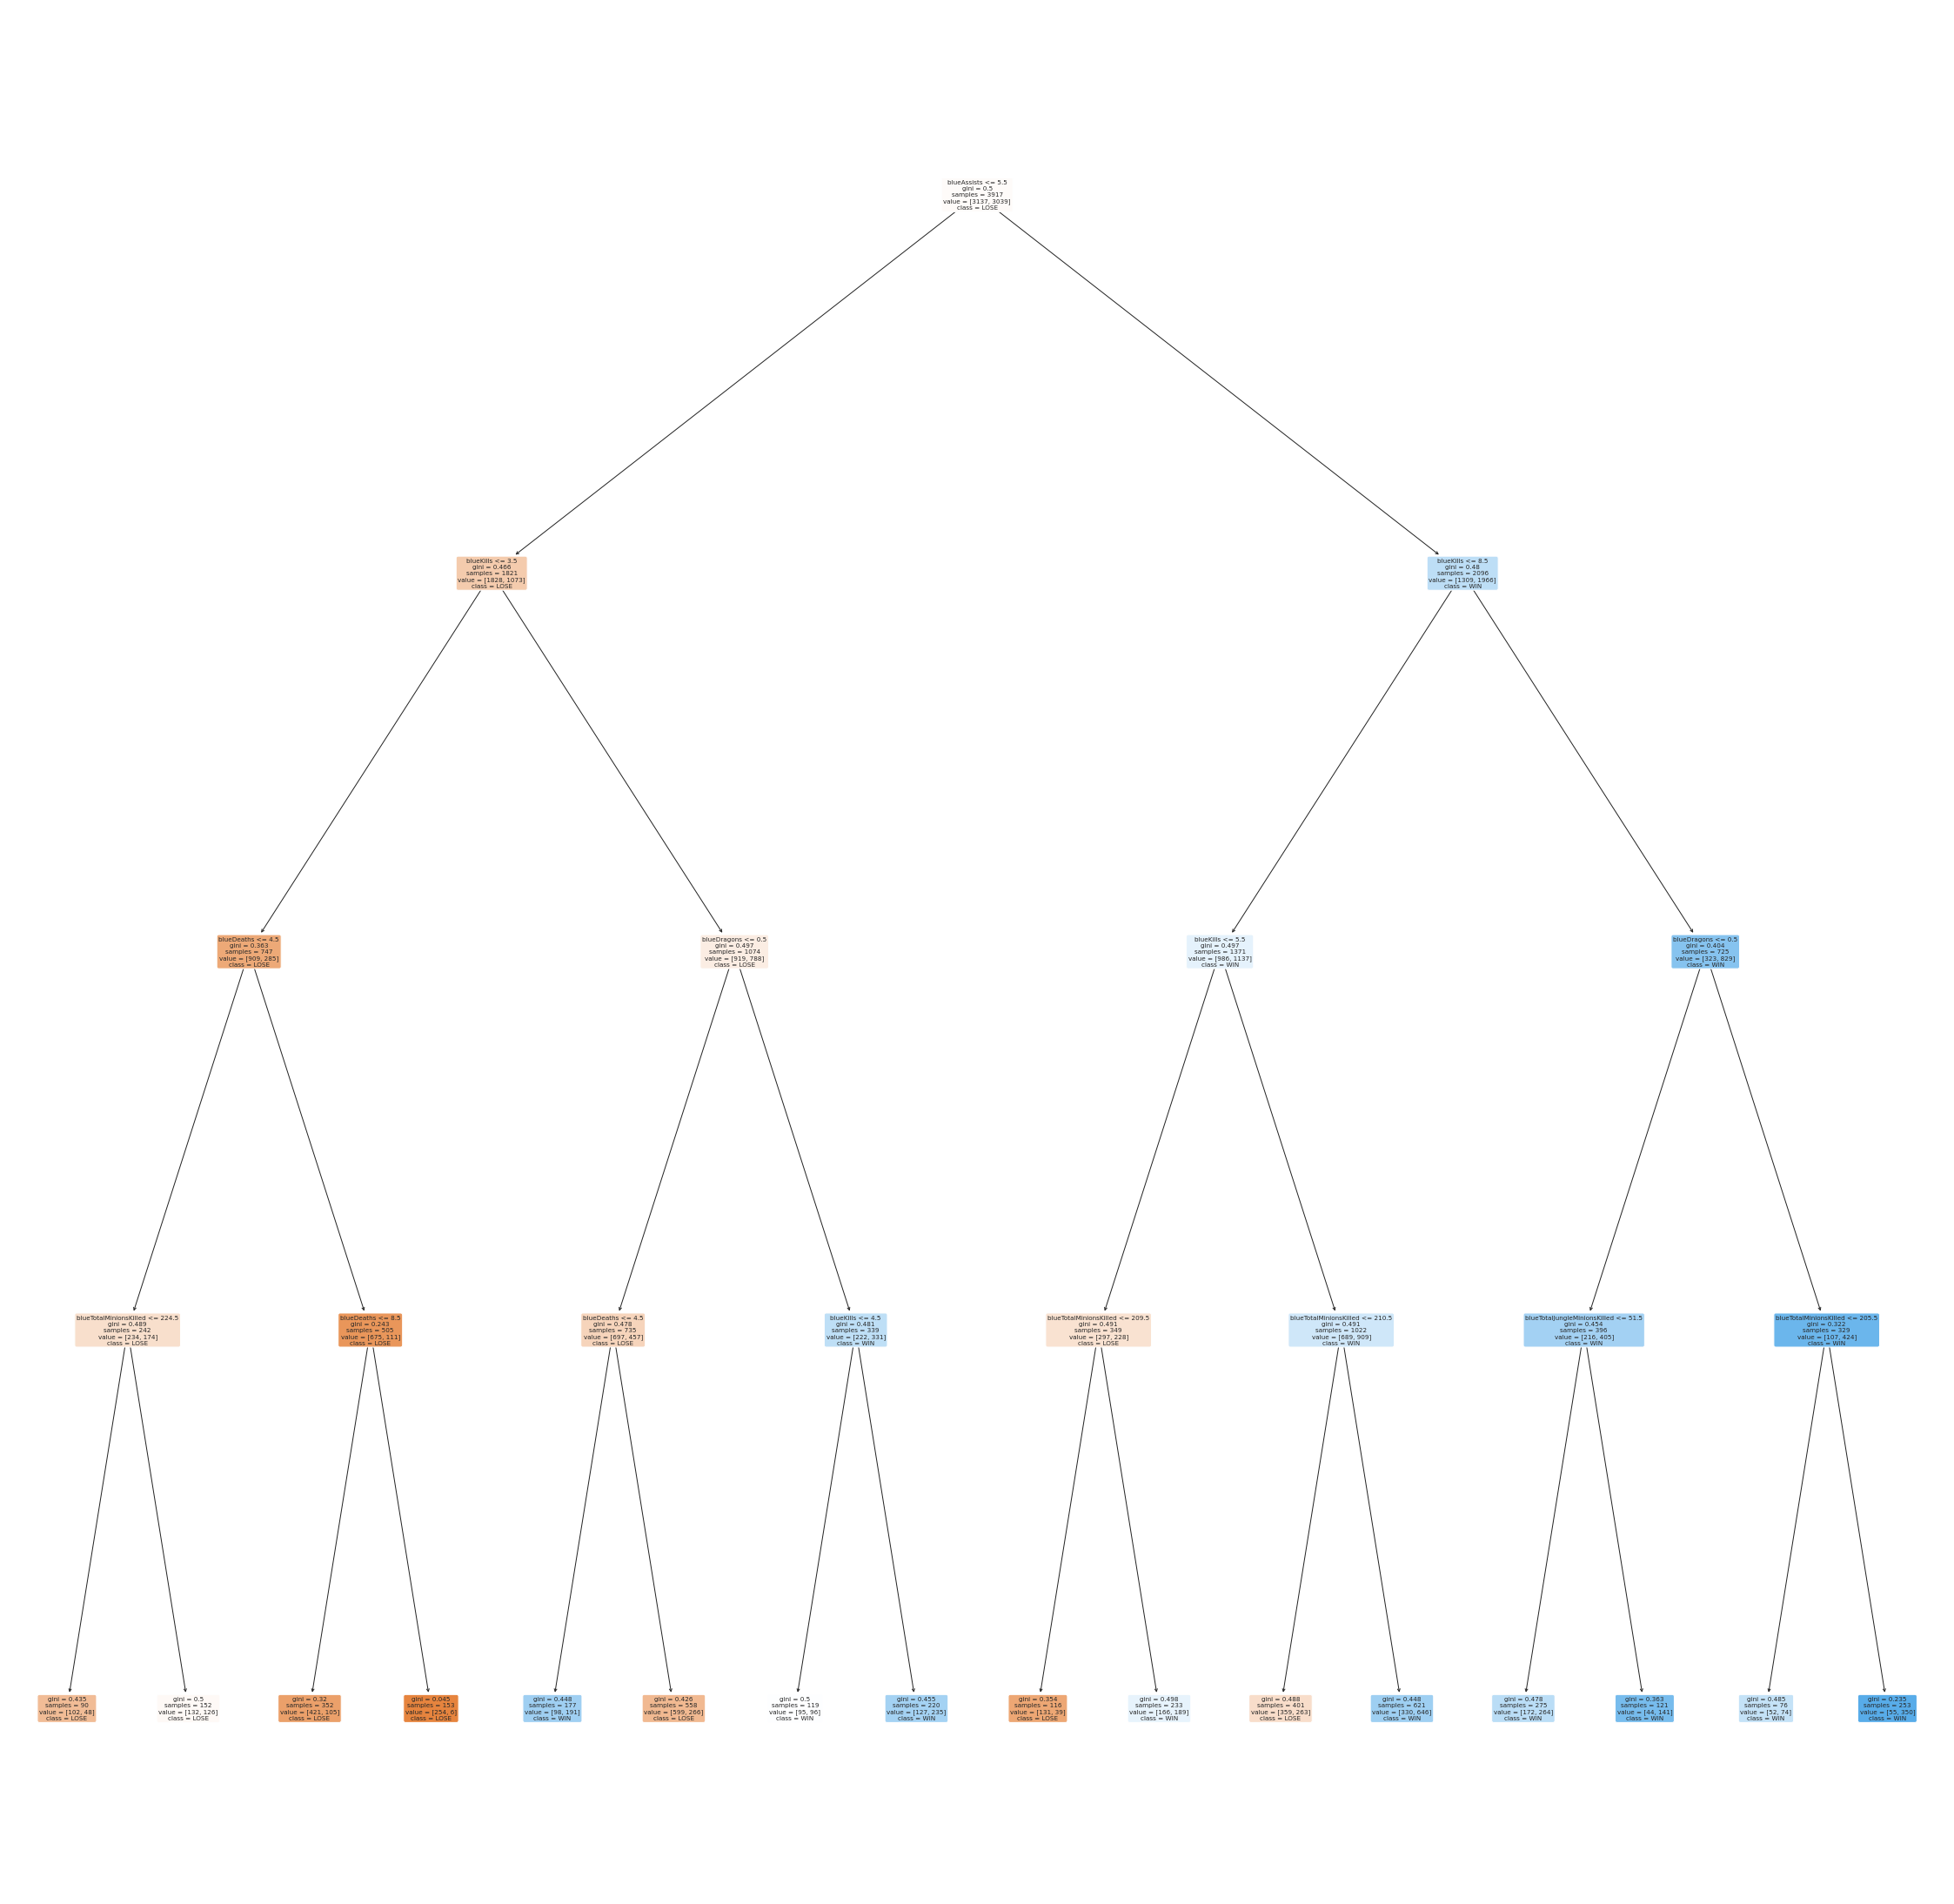

In [ ]:
from sklearn.tree import plot_tree

estimator = clf.estimators_[5] 
f = plt.figure(figsize=(40,40))
plot_tree(estimator, filled=True, rounded=True,feature_names=X_train.columns,class_names=["LOSE","WIN"])

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('R Forest', y_pred, y_test)

table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

K-Nearest Neighbours

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Accuracy')

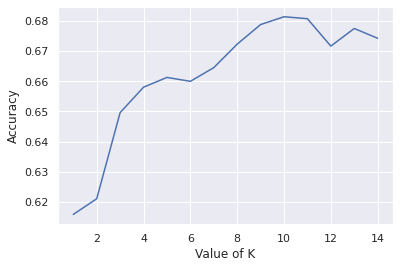

In [ ]:
k_range=range(1,15)
import matplotlib.pyplot as plt
plt.plot(k_range,mean_acc)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

In [ ]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit( X_train, y_train )
y_pred = dectree.predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('DecTree', y_pred, y_test)
table.add_row([algorithm, round(accuracy,5), round(recall,5), round(precision,5), round(f_score,5)])

# Comparision between different machine learning models

In [ ]:
print(table)

+-----------+----------+---------+-----------+---------+
| Algorithm | Accuracy |  Recall | Precision | F-Score |
+-----------+----------+---------+-----------+---------+
|   Bayes   | 0.68135  | 0.79345 |  0.65762  | 0.71918 |
|  R Forest | 0.71567  | 0.71914 |  0.72554  | 0.72233 |
|    KNN    | 0.67422  | 0.74181 |  0.66404  | 0.70077 |
|  DecTree  | 0.70661  | 0.69395 |  0.72405  | 0.70868 |
+-----------+----------+---------+-----------+---------+


# Conclusion


---
Random Forest model was the most accurate for our data with 71% accuracy. So we will pick random forest model as our prediction model. Now we need to find out which action in the game we should focus on to improve our win rate.

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

blueDeaths                      0.317157
blueKills                       0.288132
blueAssists                     0.123108
blueDragons                     0.089268
blueTotalMinionsKilled          0.088300
blueFirstBlood                  0.052415
blueTotalJungleMinionsKilled    0.020069
blueTowersDestroyed             0.009188
blueHeralds                     0.004766
blueWardsPlaced                 0.004226
blueWardsDestroyed              0.003372
dtype: float64
